<a href="https://colab.research.google.com/github/geethak15/intro-to-ML-geetha/blob/master/redwine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

dataset = pd.read_csv('/content/winequality-red.csv')

In [ ]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:

dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:

dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:

dataset.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


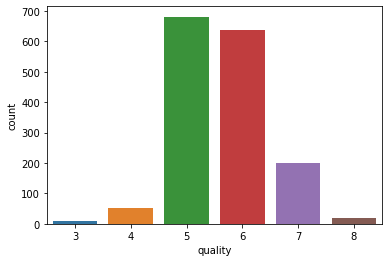

In [ ]:

import seaborn as sns
sns.countplot(x='quality', data=dataset)

In [ ]:

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)

Encoding Textual information
Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:

le = LabelEncoder()

In [ ]:
dataset['quality']= le.fit_transform(dataset['quality'])

In [ ]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

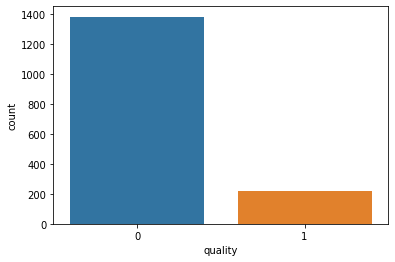

In [ ]:
sns.countplot(dataset['quality'])

Seperating the dataset as response and feature variable

In [ ]:

x = dataset.drop('quality', axis = 1)
y = dataset['quality']



Split to Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1279
320
1279
320


Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
print(dataset.describe())

       fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     0.135710
std         1.741096          0.179060  ...     1.065668     0.342587
min         4.600000          0.120000  ...     8.400000     0.000000
25%         7.100000          0.390000  ...     9.500000     0.000000
50%         7.900000          0.520000  ...    10.200000     0.000000
75%         9.200000          0.640000  ...    11.100000     0.000000
max        15.900000          1.580000  ...    14.900000     1.000000

[8 rows x 12 columns]


checking for classification model
Logistic Regression
KNN
Decision Tree
Random Forest
linear SVC
Kernel SVC

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
l_cla = LogisticRegression()
k_cla = KNeighborsClassifier()
d_cla = DecisionTreeClassifier()
r_cla = RandomForestClassifier(n_estimators = 10)
s_cla = SVC(kernel='linear')
ks_cla = SVC(kernel= 'rbf')

In [ ]:
l_cla.fit(x_train, y_train)
k_cla.fit(x_train, y_train)
d_cla.fit(x_train, y_train)
r_cla.fit(x_train, y_train)
s_cla.fit(x_train, y_train)
ks_cla.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:

l_pred = l_cla.predict(x_test)
k_pred = k_cla.predict(x_test)
d_pred = d_cla.predict(x_test)
r_pred = r_cla.predict(x_test)
s_pred = s_cla.predict(x_test)
ks_pred = ks_cla.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
l_c = confusion_matrix(y_test, l_pred)
k_c = confusion_matrix(y_test, k_pred)
d_c = confusion_matrix(y_test, d_pred)
r_c = confusion_matrix(y_test, r_pred)
s_c = confusion_matrix(y_test, s_pred)
ks_c = confusion_matrix(y_test, ks_pred)

In [ ]:
print(l_c) 
print(k_c) 
print(d_c) 
print(r_c) 
print(s_c) 
print(ks_c)

[[275  12]
 [ 19  14]]
[[278   9]
 [ 17  16]]
[[260  27]
 [ 13  20]]
[[281   6]
 [ 16  17]]
[[287   0]
 [ 33   0]]
[[282   5]
 [ 20  13]]


In [ ]:
from sklearn.metrics import accuracy_score
l_a = accuracy_score(y_test, l_pred)
k_a = accuracy_score(y_test, k_pred)
d_a = accuracy_score(y_test, d_pred)
r_a = accuracy_score(y_test, r_pred)
s_a = accuracy_score(y_test, s_pred)
ks_a = accuracy_score(y_test, ks_pred)

In [ ]:
print('Logistic Regression: ' + str(l_a) + '\nKNN: ' + str(k_a) + '\nDecision Tree: ' + str(d_a) + '\nRandom Forest: ' + str(r_a) + '\nLinear SVC: ' + str(s_a) + '\nKernel SVC: ' + str(ks_a))

Logistic Regression: 0.903125
KNN: 0.91875
Decision Tree: 0.875
Random Forest: 0.93125
Linear SVC: 0.896875
Kernel SVC: 0.921875


Random forest shows the accuracy of 93.135 percentage

So from above,we can conclude that Random Forest classifier shows the highest accuracy



Checking for Regression model
Linear Regression
Polynomial Regression
Decision Tree
Random Forest
Support Vector Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:

m_reg = LinearRegression()
p_reg = LinearRegression()
d_reg = DecisionTreeRegressor()
r_reg = RandomForestRegressor(n_estimators = 500)
s_reg = SVR()

In [ ]:
x_poly = PolynomialFeatures(degree = 5)
x_poly = x_poly.fit_transform(x_train)

In [ ]:

m_reg.fit(x_train , y_train)
p_reg.fit(x_poly , y_train)
d_reg.fit(x_train , y_train)
r_reg.fit(x_train , y_train)
s_reg.fit(x_train , y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
temp = PolynomialFeatures(degree = 5)
temp = temp.fit_transform(x_test)

In [ ]:
m_pred = m_reg.predict(x_test)
p_pred = p_reg.predict(temp)
d_pred = d_reg.predict(x_test)
r_pred = r_reg.predict(x_test)
s_pred = s_reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
m = r2_score(y_test ,m_pred)
p = r2_score(y_test ,p_pred)
d = r2_score(y_test ,d_pred)
r = r2_score(y_test ,r_pred)
s = r2_score(y_test , s_pred)

In [ ]:
print('Linear regression:'+ str(m) + '\npolynomialFeatures:' + str(p) + '\ndecisiontree:' + str(d) + '\nRandomForest:' + str(r) +'\nSupportVectorRegression:' + str(s) )

Linear regression:0.22111770775681405
polynomialFeatures:-8951.520231784129
decisiontree:-0.419068736141907
RandomForest:0.44851447999155303
SupportVectorRegression:0.40423984022510806


Here we are getting negative values for our regression models and score is also comparatively less as compared to classification model

So from above results,we can conclude that Classification model is best fit for our dataset

Geetha K